<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 163.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 178.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 86.8 MB/s eta 0:00:00


Import pandas module


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Import matplotlib


In [ ]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:
## Write your code here
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)
duplicate_rows = df[df.duplicated()]
print("\nFirst few duplicate rows:")
print(duplicate_rows.head())

Number of duplicate rows: 20

First few duplicate rows:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to ope

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [8]:
## Write your code here
# Step 1: Identify duplicates based on selected columns
subset_cols = ['MainBranch', 'Employment', 'RemoteWork']
duplicates_subset = df[df.duplicated(subset=subset_cols, keep=False)]

# Step 2: Display the number and some of these rows
print("Number of duplicate rows based on subset columns:", duplicates_subset.shape[0])
print("\nSample duplicate rows based on subset:")
print(duplicates_subset[subset_cols + ['Country', 'Age']].head())  # add a few more columns for context

# Step 3: Analyze which columns are frequently identical across these rows
# Group the duplicates by the subset to compare within groups
grouped = duplicates_subset.groupby(subset_cols)

# Count how often other columns have identical values within each group
from collections import Counter

def get_identical_columns(group):
    identical = []
    for col in df.columns:
        if col in subset_cols:
            continue
        if group[col].nunique() == 1:  # all values are the same
            identical.append(col)
    return identical

# Analyze all groups
column_matches = []

for group_key, group_df in grouped:
    identical_cols = get_identical_columns(group_df)
    column_matches.extend(identical_cols)

# Step 4: Summarize the frequency of identical columns
column_match_counts = pd.Series(Counter(column_matches)).sort_values(ascending=False)

print("\nColumns that frequently have identical values in duplicate rows (based on subset):")
print(column_match_counts)


Number of duplicate rows based on subset columns: 65290

Sample duplicate rows based on subset:
                       MainBranch           Employment RemoteWork  \
0  I am a developer by profession  Employed, full-time     Remote   
1  I am a developer by profession  Employed, full-time     Remote   
2  I am a developer by profession  Employed, full-time     Remote   
3           I am learning to code   Student, full-time        NaN   
4  I am a developer by profession   Student, full-time        NaN   

                                             Country                 Age  
0                           United States of America  Under 18 years old  
1  United Kingdom of Great Britain and Northern I...     35-44 years old  
2  United Kingdom of Great Britain and Northern I...     45-54 years old  
3                                             Canada     18-24 years old  
4                                             Norway     18-24 years old  

Columns that frequently have identical

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


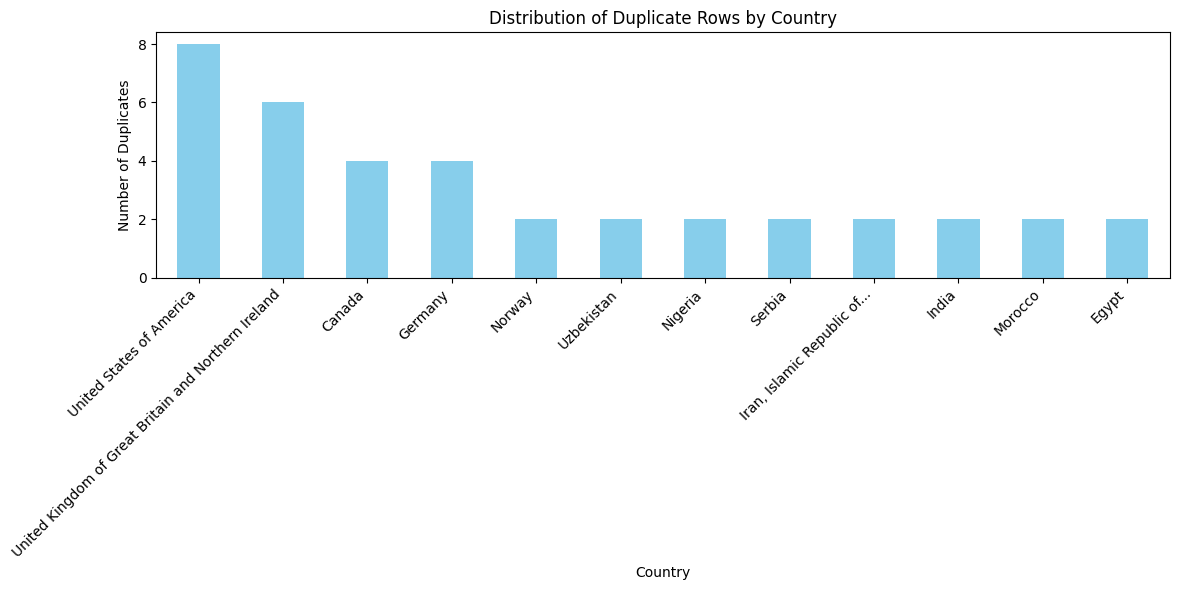

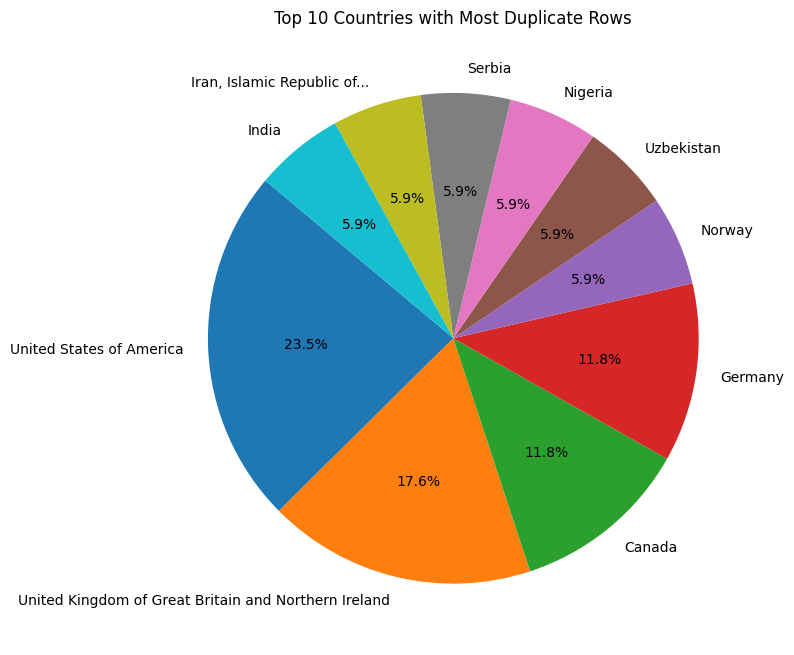

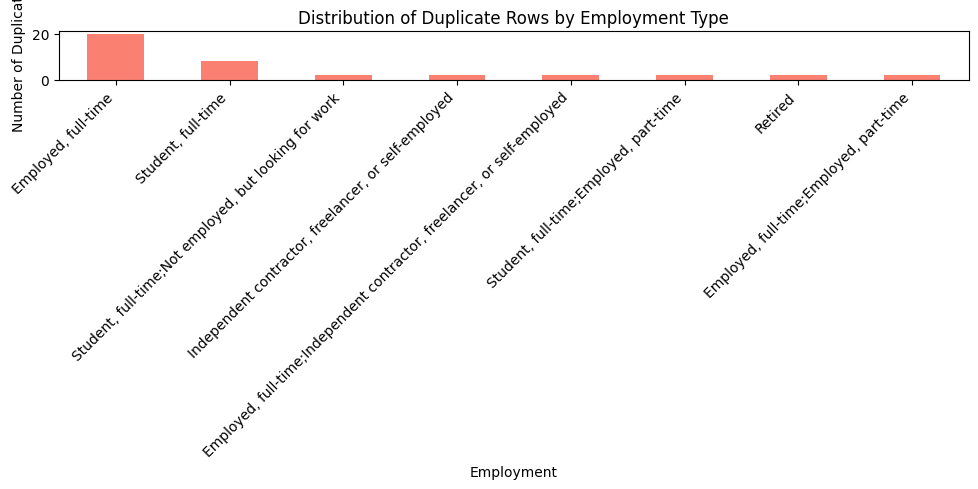

In [9]:
## Write your code here
# Identify full duplicate rows
duplicates = df[df.duplicated(keep=False)]

# ------------ Distribution by Country -------------
# Count duplicates by Country
country_counts = duplicates['Country'].value_counts()

# Bar chart: Duplicates by Country
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Duplicate Rows by Country")
plt.xlabel("Country")
plt.ylabel("Number of Duplicates")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ------------ Pie chart: Top 10 countries -------------
top_countries = country_counts.head(10)

plt.figure(figsize=(8, 8))
top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Countries with Most Duplicate Rows")
plt.ylabel("")  # Hide y-label
plt.tight_layout()
plt.show()

# ------------ Distribution by Employment -------------
# Count duplicates by Employment
employment_counts = duplicates['Employment'].value_counts()

# Bar chart: Duplicates by Employment
plt.figure(figsize=(10, 5))
employment_counts.plot(kind='bar', color='salmon')
plt.title("Distribution of Duplicate Rows by Employment Type")
plt.xlabel("Employment")
plt.ylabel("Number of Duplicates")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [11]:
## Write your code here
# Define the subset of columns for uniqueness
key_columns = ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'Age']

# Drop duplicates based on key columns
df_deduplicated = df.drop_duplicates(subset=key_columns)

# Show how much data was removed
print("Original dataset shape:", df.shape)
print("After removing duplicates based on key columns:", df_deduplicated.shape)

# Optional: Save cleaned version
df_deduplicated.to_csv("survey_cleaned.csv", index=False)


Original dataset shape: (65457, 114)
After removing duplicates based on key columns: (12141, 114)


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
